# Paleontology Machine Learning Project


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
#import google.colab
#from google.colab import files
#uploaded = files.upload()

  # Processing data

In [2]:
data = pd.read_csv('thegigafile.csv')

In [3]:
#Vizualising data 
data

,max_ma,min_ma,genus,lng,lat,paleolng,paleolat,lithology1,composition
0,353.8,345.3,Australosutura,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
1,353.8,345.3,Carbonocoryphe,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
2,353.8,345.3,Thigriffides,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
3,353.8,345.3,Pudoproetus,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
4,353.8,345.3,Pudoproetus,-98.099998,31.000000,-65.59,-27.46,"""carbonate""","low Mg calcite, chitin"
...,...,...,...,...,...,...,...,...,...
743654,99.6,93.5,Lepicerus,96.720001,26.360001,105.50,8.29,amber,chitin
743655,468.1,460.9,Eremotoechia,-86.784721,33.311111,-114.63,-8.13,"""limestone""",low Mg calcite
743656,467.3,458.4,Eremotoechia,-84.129166,35.741669,-112.38,-10.30,"""limestone""",low Mg calcite
743657,467.3,458.4,Eremotoechia,-84.125000,35.750000,-112.37,-10.29,"""limestone""",low Mg calcite


In [4]:
print(len(data.columns))

9


# K-nearest neighbor method  1D (Space/Genus)


In [5]:
#Import stuff for k-nearest neighbor 
import sklearn.neighbors
import sklearn.linear_model
from sklearn.utils import shuffle
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#from mpl_toolkits.basemap import Basemap




In [6]:

#Test here on only three data frame
new_table = data[['lng', 'lat', 'genus']].copy()


In [7]:
new_table

,lng,lat,genus
0,-98.099998,31.000000,Australosutura
1,-98.099998,31.000000,Carbonocoryphe
2,-98.099998,31.000000,Thigriffides
3,-98.099998,31.000000,Pudoproetus
4,-98.099998,31.000000,Pudoproetus
...,...,...,...
743654,96.720001,26.360001,Lepicerus
743655,-86.784721,33.311111,Eremotoechia
743656,-84.129166,35.741669,Eremotoechia
743657,-84.125000,35.750000,Eremotoechia


# 1) Using k-nearest neighbor with 3 genuses 

##Look at the most occurences of genuses 

In [8]:
genus_counts = new_table['genus'].value_counts().reset_index()
genus_counts.columns = ['genus', 'count']
genus_counts = genus_counts.sort_values(by='count', ascending=False)

# Print the ranking
print("Ranking of genera with the most occurrences:")
#for index, row in genus_counts.iterrows():
#    print(f"{index+1}. {row['genus']}: {row['count']} occurrences")

Ranking of genera with the most occurrences:


In [9]:
filtered_table = new_table[new_table['genus'].isin(['Eremotoechia', 'Pudoproetus', 'Carbonocoryphe'])]

In [37]:
filtered_table = filtered_table.sample(frac=1).reset_index(drop=True)
len(filtered_table)

38

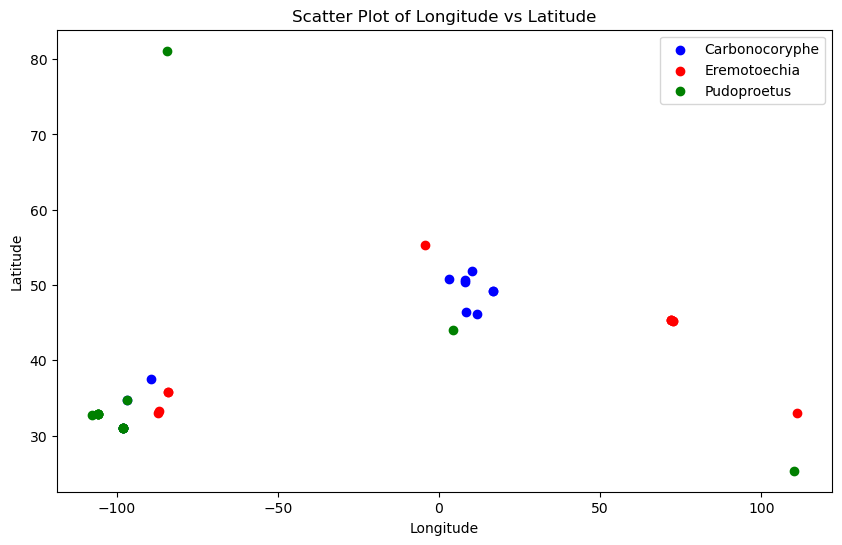

In [47]:


color_map = {
    'Carbonocoryphe': 'blue',
    'Pudoproetus': 'green',
    'Eremotoechia': 'red'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for genus, group in filtered_table.groupby('genus'):
    plt.scatter(group['lng'], group['lat'], label=genus, color=color_map[genus])

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.legend()

# Show the plot
plt.show()

In [48]:
# Get the number of rows in the DataFrame
total_rows = len(filtered_table)

# Select the indices for training and testing sets
train_indices = list(range(total_rows - 10))  # Use all rows except the last 10 for training
test_indices = list(range(total_rows - 10, total_rows))  # Use the last 10 rows for testing

# Split the DataFrame into training and testing sets
x_train = filtered_table.iloc[train_indices][['lng', 'lat']]  # Assuming 'lng' and 'lat' are the features
y_train = filtered_table.iloc[train_indices]['genus']
x_test = filtered_table.iloc[test_indices][['lng', 'lat']]
y_test = filtered_table.iloc[test_indices]['genus']


#try to use k-nearest neighbor on simple data 
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
model.fit(X=x_train, y=y_train)# --> modify this line to get something better ? 

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8


In [49]:
filtered_table2 = new_table[new_table['genus'].isin(['Ostrea', 'Composita', 'Chlamys'])]

In [50]:
filtered_table2= filtered_table2.sample(frac=1).reset_index(drop=True)# --> shuffle the rows 
len(filtered_table2)

5081

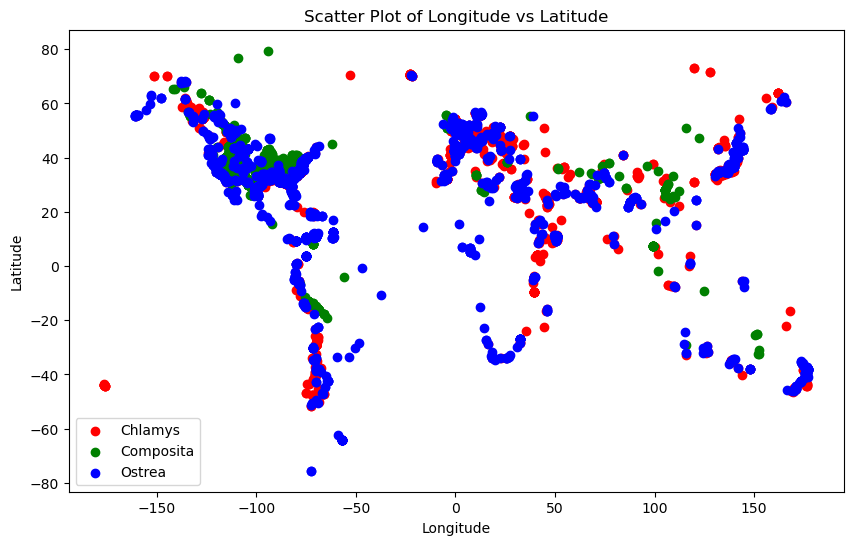

In [51]:
color_map = {
    'Ostrea': 'blue',
    'Composita': 'green',
    'Chlamys': 'red'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for genus, group in filtered_table2.groupby('genus'):
    plt.scatter(group['lng'], group['lat'], label=genus, color=color_map[genus])

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.legend()

# Show the plot
plt.show()

In [52]:
# Get the number of rows in the DataFrame
total_rows = len(filtered_table2)

# Select the indices for training and testing sets
train_indices = list(range(total_rows - 10))  # Use all rows except the last 10 for training
test_indices = list(range(total_rows - 10, total_rows))  # Use the last 10 rows for testing

# Split the DataFrame into training and testing sets
x_train = filtered_table2.iloc[train_indices][['lng', 'lat']]  # Assuming 'lng' and 'lat' are the features
y_train = filtered_table2.iloc[train_indices]['genus']
x_test = filtered_table2.iloc[test_indices][['lng', 'lat']]
y_test = filtered_table2.iloc[test_indices]['genus']


#try to use k-nearest neighbor on simple data 
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=2)
model.fit(X=x_train, y=y_train)# --> modify this line to get something better ? 

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9


Very unstable accuracy: changes from 0.5 to 0.9. Not very useful. 

# 2) k nearest neighbor 3D (Space/ Time/ genuses)

Lets first renormalize the columns. We need to find a way to calculate distance

In [17]:
#defining a new metric for 3D knn using haversine distance and difference in time
from sklearn.metrics.pairwise import haversine_distances
def timespace_metric(X: np.array ,Y: np.array):
    place1=X[:2]
    place2=Y[:2]
    space= haversine_distances([place1],[place2])/np.pi
    time=np.abs(X[-1]-Y[-1])/587.99415
    return (space+3*time)[0][0]

In [18]:
# checking for the max time difference to renormalize
matrix=data.values
mat=(matrix[:, 0]+matrix[:, 1])/2
M=max(mat)
m=min(mat)
M-m

587.99415

In [52]:
#looks good
timespace_metric(np.array([0,0,0]),np.array([np.pi,0,0]))

1.0

In [19]:
#creating the right subdataframe
data3d=data.copy
data3d=data[['lng', 'lat', 'genus']].copy()
data3d['time']=(data['max_ma']+data['min_ma'])/2
data3d = data3d[data3d['genus'].isin(['Ostrea', 'Composita', 'Chlamys'])]
data3d

,lng,lat,genus,time
217,-95.854721,36.123611,Composita,309.85
274,-95.421944,37.185833,Composita,328.90
285,-96.002502,35.937778,Composita,309.85
304,-96.430832,35.123890,Composita,309.85
319,-95.421944,37.185833,Composita,328.90
...,...,...,...,...
742386,-121.123001,37.222000,Ostrea,69.05
742388,-121.113998,37.223000,Ostrea,69.05
742473,-121.211998,37.203999,Ostrea,97.20
742653,-121.094002,37.192001,Ostrea,69.05


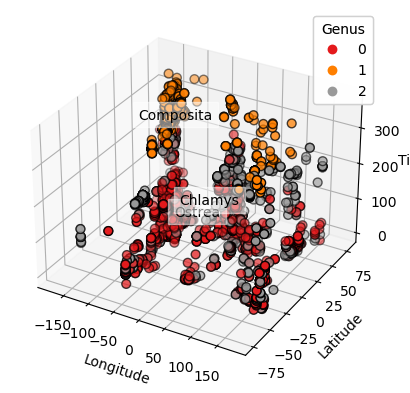

In [53]:
#3D Vizualisation added recently by me --> Oscar :) 
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data3d['lng'], data3d['lat'], data3d['time'], c=data3d['genus'].map({'Ostrea': 0, 'Composita': 1, 'Chlamys': 2}), cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Genus")
ax.add_artist(legend1)


for name, label in [('Ostrea', 0), ('Composita', 1), ('Chlamys', 2)]:
    ax.text3D(data3d[data3d['genus'] == name]['lng'].mean(),
              data3d[data3d['genus'] == name]['lat'].mean(),
              data3d[data3d['genus'] == name]['time'].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

plt.show()


In [59]:
def train3dknn(timespaceratio,neighbors=5,test_size=100):
    #timespaceratio is time_importance/space_importance
    def timespace_metric(X: np.array ,Y: np.array):
        place1=X[:2]
        place2=Y[:2]
        space= haversine_distances([place1],[place2])/np.pi
        time=np.abs(X[-1]-Y[-1])/587.99415
        return (space+timespaceratio*time)[0][0]
    
    # Select the indices for training and testing sets
    train_indices_3D = list(range(total_rows - test_size))  # Use all rows except the last 10 for training
    test_indices_3D = list(range(total_rows - test_size, total_rows))  # Use the last 10 rows for testing
    
    # Split the DataFrame into training and testing sets
    x_train_3D = data3d.iloc[train_indices_3D][['lng', 'lat','time']]  # Assuming 'lng' and 'lat' are the features
    y_train_3D = data3d.iloc[train_indices_3D]['genus']
    x_test_3D = data3d.iloc[test_indices_3D][['lng', 'lat','time']]
    y_test_3D = data3d.iloc[test_indices_3D]['genus']
    
    
    #try to use k-nearest neighbor on simple data 
    model3d = sklearn.neighbors.KNeighborsClassifier(n_neighbors=neighbors,metric=timespace_metric)
    model3d.fit(X=x_train_3D, y=y_train_3D)
    
    # Make predictions on the test set
    y_pred_3D = model3d.predict(x_test_3D)
    
    accuracy3D = accuracy_score(y_test_3D, y_pred_3D)
    return accuracy3D

In [60]:
train3dknn(3)

0.77

# 3) Logistic regression 

# 4) PCA ? for higher dimensions 
